In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [309]:
housing=pd.read_csv('Housing.csv')

In [310]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [311]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [312]:
# Converting Yes to 1 and No to 0 using map function
def func(i):
    if i=='yes':
        return 1
    else:
        return 0
housing['mainroad'] = housing['mainroad'].map(func)
housing['guestroom'] = housing['guestroom'].map(func)
housing['basement'] = housing['basement'].map(func)
housing['hotwaterheating'] = housing['hotwaterheating'].map(func)
housing['airconditioning'] = housing['airconditioning'].map(func)
housing['prefarea'] = housing['prefarea'].map(func)

In [313]:
# Now let's see the head
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [205]:
#The variable 'furnishingstatus' had three levels. We need to convert it to integer.


In [314]:

# Creating a dummy variable for 'furnishingstatus' or you can say we want to do one-hot encoding on it.
status =pd.get_dummies(housing['furnishingstatus'])

In [315]:
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [316]:
# we don't need 3 columns.
# we can use drop_first = True to drop the first column from status dataframe.
status = status.drop('furnished',axis=1)



In [317]:
status

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
540,0,1
541,1,0
542,0,1
543,0,0


In [318]:
#Adding the results to the master dataframe i.e housing
frame=[housing,status]
housing=pd.concat(frame,axis=1)
housing


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [319]:
# Dropping furnishingstatus from housing data as we have created the dummies for it

housing.drop('furnishingstatus',axis=1,inplace=True)

In [320]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [321]:
# Let us create the new metric and assign it to "areaperbedroom". As name suggested, need to calculate area per bedroom
housing['areaperbedroom'] = housing['area']/housing['bedrooms']

In [322]:
# Create another new Metric:bathrooms per bedroom
housing['bbratio'] = housing['bathrooms']/housing['bedrooms']


In [323]:
# check head of housing

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [324]:
### Rescaling the Features 
def normalize (x):
    N= (x-min(x))/(max(x) - min(x))
    return N
    # code here

                                            
                                              
# applying normalize ( ) to all columns using apply function 
housing = housing.apply(normalize)
housing


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0,1.0,0.179932,0.4
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.067374,0.2
542,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.229780,0.4
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.094710,0.2


In [325]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [326]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]



# Putting response variable to y ie. price
y = housing['price']



In [327]:
# import test_train_split module
from sklearn.model_selection import train_test_split


# test and train split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100,test_size=0.3,train_size=0.7)


In [220]:
#Building a linear model

In [328]:
# Importing statsmodels module as sm

import statsmodels.api as sm
          

# Adding a constant column to our X_train dataframe
X_train = sm.add_constant(X_train)
    

# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()

C:\Users\Lenovo\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [289]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           4.56e-82
Time:                        18:30:27   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059      1.029      0.304      -0.055       0.176
area                0.5745      0.134      4.285      0.000       0.311       0.838
bedrooms           -0.0587      0.093     -0.632      0.528      -0.241       0.124
bathrooms           0.2336      0.126      1.849      0.065      -0.015       0.482
stories             0.1018      0.019      5.265      0.000       0.064       0.140
mainroad            0.0511      0.014      3.580      0.000       0.023       0.079
guestroom           0.0260      0.014      1.887      0.060      -0.001       0.053
basement            0.0208      0.011      1.877      0.061      -0.001       0.043
hotwaterheating     0.0875      0.022      4.048      0.000       0.045       0.130
airconditioning     0.0663      0.011      5.868      0.000       0.044       0.088
parking             0.0562      0.018      3.104      0.002       0.021       0.092
prefarea            0.0566      0.012      4.772      0.000       0.033       0.080
semi-furnished     -0.0008      0.012     -0.068      0.946      -0.024       0.022
unfurnished        -0.0323      0.013     -2.550      0.011      -0.057      -0.007
areaperbedroom     -0.3135      0.147     -2.139      0.033      -0.602      -0.025
bbratio             0.0439      0.104      0.421      0.674      -0.161       0.249
==============================================================================
Omnibus:                       87.283   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.328
Skew:                           1.023   Prob(JB):                     9.91e-61
Kurtosis:                       6.636   Cond. No.                         82.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [329]:
from sklearn.metrics import mean_squared_error
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.09931991013218683


In [223]:
#Checking Multicollinearity

<AxesSubplot:>

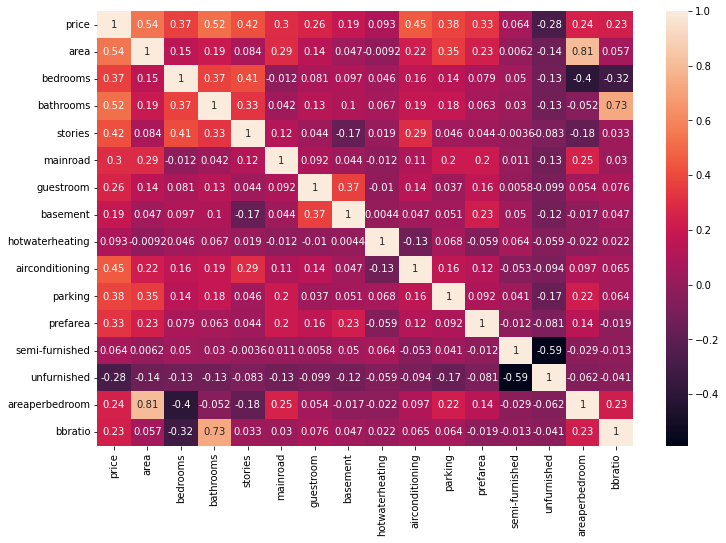

In [330]:
plt.figure(figsize=(12,8))

sns.heatmap(housing.corr(),annot=True)

In [225]:
#Checking VIF (variance inflation factor)

In [331]:
# import variance_inflation_factor module

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define vif_scores function as stated above
def vif_scores(input_data):
    # code here
    vif=pd.DataFrame()
    vif['Features']=input_data.columns
    vif['VIF_value']=[variance_inflation_factor(input_data.values,i) for i in range(input_data.shape[1])]
    return(vif)
    
features=housing.iloc[:,1:]
vif_scores(features)
    


# print vif scores for all current input features




,Features,VIF_value
0,area,57.516048
1,bedrooms,10.683404
2,bathrooms,11.106354
3,stories,2.805901
4,mainroad,7.910522
5,guestroom,1.492428
6,basement,2.045854
7,hotwaterheating,1.097694
8,airconditioning,1.768615
9,parking,2.007955


In [227]:
# there are two groups of multicollinear variables
#areaperbedroom and area
#bbratio and bathrooms

In [332]:


features=features.drop(['bbratio','bedrooms','areaperbedroom','bathrooms','basement','mainroad'],1)
vif_scores(features)



C:\Users\Lenovo\AppData\Local\Temp/ipykernel_41664/1638082782.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features=features.drop(['bbratio','bedrooms','areaperbedroom','bathrooms','basement','mainroad'],1)


,Features,VIF_value
0,area,3.531109
1,stories,1.898127
2,guestroom,1.270006
3,hotwaterheating,1.078916
4,airconditioning,1.745741
5,parking,1.909512
6,prefarea,1.410633
7,semi-furnished,1.681267
8,unfurnished,1.392327


#making predictions by rebuilding model

#Lets do another test train split after dropping highly correlated variables and insignificant variables from X.

In [333]:
#Putting feature variable to X
X=housing[['area','stories','guestroom','hotwaterheating','airconditioning','parking','prefarea','unfurnished',]]
y=housing['price']

In [334]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,train_size=0.7,random_state=100)

In [231]:
#building linear model again

In [335]:

X_train.reset_index(drop=True,inplace=True)

In [336]:
y_train.reset_index(drop=True,inplace=True)




In [337]:

# Adding a constant column to  X_train dataframe
X_train = sm.add_constant(X_train)

# Adding a constant variable to  X_test dataframe
X_test = sm.add_constant(X_test)


# create a second fitted model
lm_2 = sm.OLS(y_train,X_train).fit()

C:\Users\Lenovo\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [297]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           4.56e-82
Time:                        18:31:43   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059      1.029      0.304      -0.055       0.176
area                0.5745      0.134      4.285      0.000       0.311       0.838
bedrooms           -0.0587      0.093     -0.632      0.528      -0.241       0.124
bathrooms           0.2336      0.126      1.849      0.065      -0.015       0.482
stories             0.1018      0.019      5.265      0.000       0.064       0.140
mainroad            0.0511      0.014      3.580      0.000       0.023       0.079
guestroom           0.0260      0.014      1.887      0.060      -0.001       0.053
basement            0.0208      0.011      1.877      0.061      -0.001       0.043
hotwaterheating     0.0875      0.022      4.048      0.000       0.045       0.130
airconditioning     0.0663      0.011      5.868      0.000       0.044       0.088
parking             0.0562      0.018      3.104      0.002       0.021       0.092
prefarea            0.0566      0.012      4.772      0.000       0.033       0.080
semi-furnished     -0.0008      0.012     -0.068      0.946      -0.024       0.022
unfurnished        -0.0323      0.013     -2.550      0.011      -0.057      -0.007
areaperbedroom     -0.3135      0.147     -2.139      0.033      -0.602      -0.025
bbratio             0.0439      0.104      0.421      0.674      -0.161       0.249
==============================================================================
Omnibus:                       87.283   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.328
Skew:                           1.023   Prob(JB):                     9.91e-61
Kurtosis:                       6.636   Cond. No.                         82.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [338]:
y_pred=lm_2.predict(X_test)

In [237]:
#Model evaluation

Text(0, 0.5, 'Housing Price')

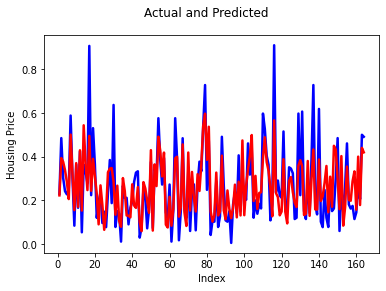

In [339]:
# Actual v/s predicted graph

c=[i for i in range(1,165,1)]
fig=plt.figure()
plt.plot(c,y_test,color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,y_pred,color='red',linewidth=2.5,linestyle='-')
fig.suptitle('Actual and Predicted')
plt.xlabel('Index')
plt.ylabel('Housing Price')


Text(0.5, 0.98, 'Error Terms')

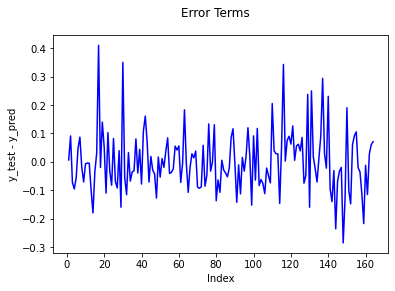

In [341]:
# Plotting line chart of error terms
fig=plt.figure()
c=[i for i in range(1,165,1)]
plt.plot(c, y_test-y_pred,color='blue')
plt.xlabel('Index')
plt.ylabel('y_test - y_pred')
fig.suptitle('Error Terms')

C:\Users\Lenovo\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Error Terms')

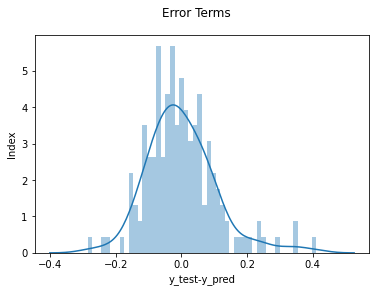

In [342]:
# Plotting the error terms as dist plot to understand the distribution
fig=plt.figure()
sns.distplot((y_test-y_pred),bins=50)
plt.xlabel('y_test-y_pred')
plt.ylabel('Index')
plt.suptitle('Error Terms')


In [343]:
# Root Mean squared error
from sklearn.metrics import mean_squared_error
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.1062042636110521


In [302]:
#MEan Squared Error
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 0.009864444548665668


In [244]:
#Mean absolute error
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))

MAE: 0.07964000900259081


In [344]:
# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [345]:
# Initializing linearRegression function 
lm = LinearRegression()


# Iitialising RFE using above model
rfe = RFE(lm)
       

# Fitting and running RFE with X_train and y_train
rfe = rfe.fit(X_train,y_train)


# Printing the boolean results for each features
print(rfe.support_)


# Printing the ranks for each features
print(rfe.ranking_)
 

[False  True  True False  True  True False False False]
[6 1 1 4 1 1 2 3 5]


In [346]:
print(len(X.columns))

8


In [347]:
col=X_train.columns[rfe.support_]
print(col)

Index(['area', 'stories', 'hotwaterheating', 'airconditioning'], dtype='object')


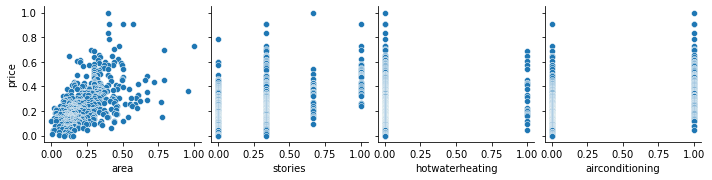

In [348]:
## Let's plot a pair plot of all RFE selected variables in housing dataframe

sns.pairplot(x_vars=col,y_vars='price',data=housing)

In [349]:
# Building model again with above selected features
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable in X_train_rfe
X_train_rfe = sm.add_constant(X_train_rfe)

# fitting your third linear model with y_train and X_train_rfe
lm_3 = sm.OLS(y_train,X_train_rfe).fit()
  

lm_3.summary()


C:\Users\Lenovo\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     95.61
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           4.94e-56
Time:                        18:34:23   Log-Likelihood:                 297.50
No. Observations:                 381   AIC:                            -585.0
Df Residuals:                     376   BIC:                            -565.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0644      0.012      5.304      0.000       0.041       0.088
area                0.4946      0.041     11.924      0.000       0.413       0.576
stories             0.1608      0.020      7.949      0.000       0.121       0.201
hotwaterheating     0.1184      0.026      4.549      0.000       0.067       0.170
airconditioning     0.0958      0.013      7.107      0.000       0.069       0.122
==============================================================================
Omnibus:                       90.111   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.848
Skew:                           1.088   Prob(JB):                     8.38e-58
Kurtosis:                       6.439   Cond. No.                         8.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [350]:
vif_scores(housing[col])

,Features,VIF_value
0,area,1.863508
1,stories,1.802535
2,hotwaterheating,1.056503
3,airconditioning,1.697956


In [272]:
# all these features look good

In [357]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[col]


# Adding a constant variable to X_test_rfe
X_test_rfe = sm.add_constant(X_test_rfe)


# Making predictions
y_pred = lm_3.predict(X_test_rfe)


C:\Users\Lenovo\anaconda3\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [275]:
# Let's evaluate the 3rd model

In [359]:
from sklearn.metrics import mean_squared_error
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.12052034880591121


Text(0, 0.5, 'y_pred')

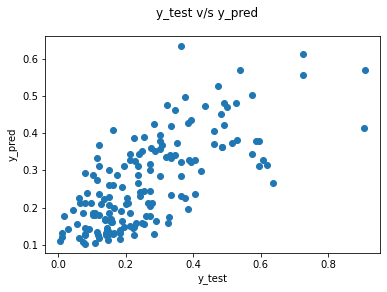

In [362]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test v/s y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')



In [284]:
#We have three metric explaination. We can see that first model is perfoming better in terms of R2 , adjusted r2 and RMSE. .
